# Assignement 2

### <span style="color:chocolate"> Submission requirements </span>

Your homework will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:

    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Define functions

In [3]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Step 1: Data ingestion

Let's start by creating some artificial data using the <span style="color:chocolate">create_1d_data()</span> function defined at the top of the notebook.

In [4]:
# Define parameters
num_examples = 70
w = 2
b = 1
bound = 1

# Create data
X, Y = create_1d_data(num_examples, w, b, bound)

# Print shapes
print('Printing shape of X:', X.shape)
print('Printing first 10 elements in X:', X[:10])
print('\nPrinting shape of Y:', Y.shape)
print('Printing first 10 elements in Y:', Y[:10])

Printing shape of X: (70,)
Printing first 10 elements in X: [0 1 2 3 4 5 6 7 8 9]

Printing shape of Y: (70,)
Printing first 10 elements in Y: [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]


---
### Step 2: Data Preprocessing

Our objectives here involve adding one more feature to X and creating data partitions.

### <span style="color:chocolate">Exercise 1:</span> Adding features (10 points)

1. Add a column of $1s$ to $X$ (this will serve as an intercept or "bias" in our modeling task later on). Note: do not create a new array, just concatenate with the current values;
2. Print the shape of the array.

In [5]:
# YOUR CODE HERE

# Note that X.shape is (70,)

# In this spirit of minimizing gloabl namespace, define functions to add bias vector

# First define a function to create a vector of ones: 
def create_bias_vec(num_examples):
    """  
    Returns a NumPy array of ones of shape (num_examples, )
    Args:
        num_examples 
    """
    return np.ones(shape=num_examples)

# Then define a function that adds the vector of ones to the input matrix
def concat_bias_vec(input_without_bias):
    """  
    Return an input matrix (m - 1, n) array the bias vector of ones
    In this homework problem n = 2
    Args:
        the input matrix (m - 1, n - 1) where there are m examples and n features including the bias
    """
    return np.stack(arrays=(create_bias_vec(input_without_bias.shape[0]), input_without_bias),
             axis=1)

# Print out the shape of the augmented input array            
X = concat_bias_vec(X)
print("Shape of X:", X.shape)

Shape of X: (70, 2)


### <span style="color:chocolate">Exercise 2:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.2 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [6]:
# YOUR CODE HERE
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=1234)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", Y_test.shape)



X_train shape: (56, 2)
X_test shape: (14, 2)
Y_train shape: (56,)
X_test shape: (14,)


---
### Step 3: Exploratory data analysis (EDA)

### <span style="color:chocolate">Exercise 3:</span> Plots (10 points)

Create a side-by-side histogram for the values in Y_train and X_train. Make sure to include axes name and titles for each subplot.

Text(0.5, 1.0, 'Distribution of X_train')

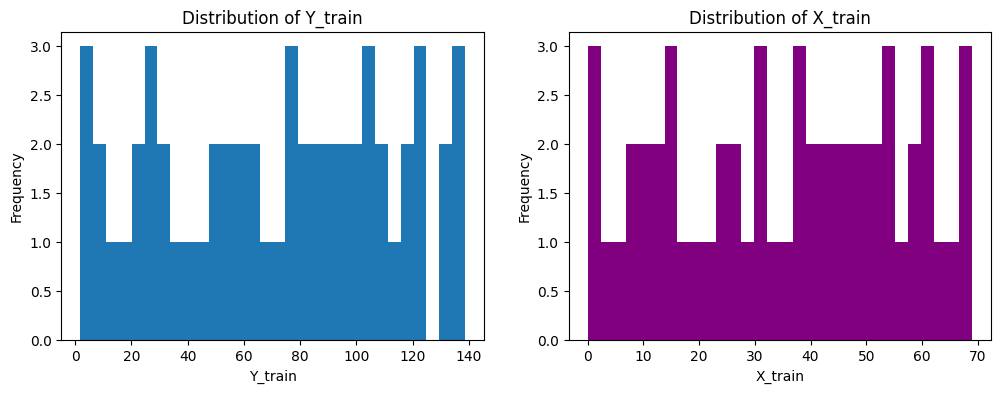

In [7]:
# YOUR CODE HERE

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(Y_train,
           bins=30)
ax[1].hist(X_train[:,1],
           bins=30,
           color='purple')
ax[0].set_xlabel("Y_train")
ax[1].set_xlabel("X_train")

ax[0].set_ylabel("Frequency")
ax[1].set_ylabel("Frequency")

ax[0].set_title("Distribution of Y_train")
ax[1].set_title("Distribution of X_train")


---
### Step 4: Modeling

Let's start by considering the two models proposed in Assignment 1:
1. $M_1(x) = 5+x$ 
2. $M_2(x) = 1+2x$

### <span style="color:chocolate">Exercise 4:</span> Practice with Parameters (10 points)

Perform the following computations:

1. Use matrix multiplication (np.dot) to create $M_1$ and $M_2$ (as previously defined) to produce vectors of predictions using the X_train data. Call these predictions M1_hat_train, M2_hat_train. Hint: the "learned" parameters are alredy provided to you;
3. Print the shapes of the predictions to verify that they match the shape of Y_train.

In [56]:
# YOUR CODE HERE

W1 = np.array([5, 1])
W2 = np.array([1, 2])

def model_prediction(input_array, W):
    """  
    Return (n,) np array predicted values
    Args:
        W: (m,) array representing weights.
        input_array: (n, m) array where n is the number of examples
            and m is the number of features including the bias
    """
    return np.dot(input_array, W)


M1_hat_train = model_prediction(X_train, W1)
M2_hat_train = model_prediction(X_train, W2)

M2_hat_train.shape
Y_train.shape
print("M1_hat_train shape:", M1_hat_train.shape)
print("M2_hat_train shape:", M2_hat_train.shape)
print(50*"*")
print("Y_train shape:", Y_train.shape)

M1_hat_train shape: (56,)
M2_hat_train shape: (56,)
**************************************************
Y_train shape: (56,)


### <span style="color:chocolate">Exercise 5:</span> Learn parameters with Gradient Descent (20 points)

1. Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">gradient_descent()</span> function below. Hint: refer to ``02 Linear Regression_helper.ipynb file``;

2. Run this function with our artificial (X_train, Y_train) data . Set learning_rate = .0002 and num_epochs = 5. Print out the weights and loss after each epoch. 

3. Generate a plot with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title.

In [9]:
def gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the gradient descent algorithm to learn learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape
  
  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1. 
  W = np.ones(n)
  
  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []
  
  for epoch in range(num_epochs):
    # Append the old weights to the weights list to keep track of them.
    weights.append(W)

    # Evaluate the current predictions for the training examples given
    # the current estimate of W. 
    predictions = model_prediction(inputs, W)
    
    # Find the difference between the predictions and the actual target
    # values.
    diff = predictions - outputs
    
    # In standard linear regression, we want to minimize the sum of squared
    # differences. Compute the mean squared error loss. Don't bother with the
    # 1/2 scaling factor here.
    loss = (1 / m) * np.square(diff).sum()
    # Append the loss to the losses list to keep a track of it.
    losses.append(loss)
    
    # Compute the gradient with respect to the loss.
    # [Formula (4) in the Gradient Descent Implementation]
    gradient = inputs.T @ (inputs @ W - outputs)

    # Update weights, scaling the gradient by the learning rate.
    W = W - learning_rate * gradient
      
  return np.array(weights), np.array(losses)

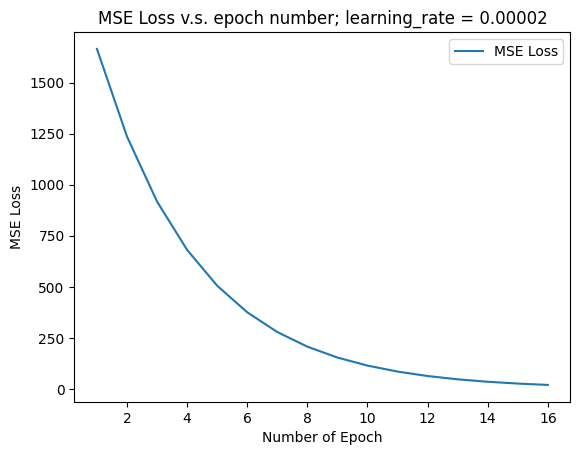

In [10]:

gradient_descent_output = gradient_descent(X_train, Y_train, 0.00002, 16)

gradient_descent_output[1].shape


fig, ax = plt.subplots()
plt.plot(np.arange(1, gradient_descent_output[0].shape[0] + 1), 
         gradient_descent_output[1],
         label="MSE Loss")
ax.set_title("MSE Loss v.s. epoch number; learning_rate = 0.00002")

ax.set_xlabel("Number of Epoch")
ax.set_ylabel("MSE Loss")

ax.legend()

In [11]:
# YOUR CODE HERE

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning plays an important role in optimizing ML models. One systematically adjusts hyperparameters to find the right balance between model complexity and generalization, ultimately leading to better predictive performance and model effectiveness.

Note that hyperparameter tuning is typically performed on **a separate validation dataset**. However, for the purposes of this assignment and based on the ML knowledge you've acquired thus far, we will perform hyperparameter tuning directly on the training data.

### <span style="color:chocolate">Exercise 6:</span> Tuning hyperparameters (10 points)

Answer the following questions:
    
1. Do you think it would be beneficial to extend the model training in Exercise 5 by increasing the learning rate to 0.02? Justify your answer;

2. Restoring to the previous learning_rate = .0002, would you  consider extending the model training in Exercise 5 by increasing the number of epochs to 10? Justify your answer.

Note: to support your answers, we recommend the following actions:
- create side-by-side subplots to show the loss at each epoch (make sure to include axes name and title), and
- print the loss at the last epoch under the following scenarios:
    - learning_rate=.0002, num_epochs=5;
    - learning_rate=.02, num_epochs=5;
    - learning_rate=.0002, num_epochs=10.

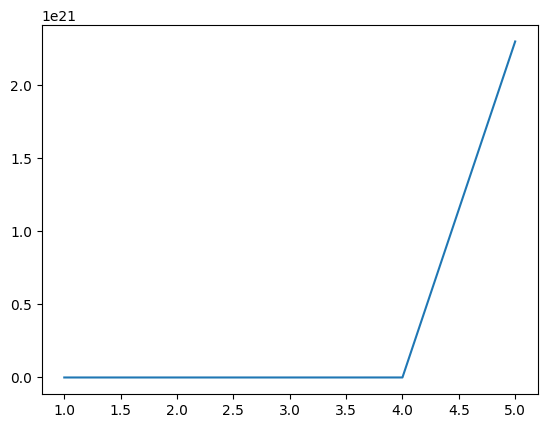

In [12]:
hyperparameter_list = [[0.002, 5],
                       [0.02, 5],
                       [0.002, 10]]

hyperparameter_list[0][1]
fig, ax = plt.subplots()
ax.plot(np.arange(1, hyperparameter_list[0][1] + 1),
            gradient_descent(X_train, Y_train, 
                            learning_rate=hyperparameter_list[0][0],
                            num_epochs=hyperparameter_list[0][1])[1])

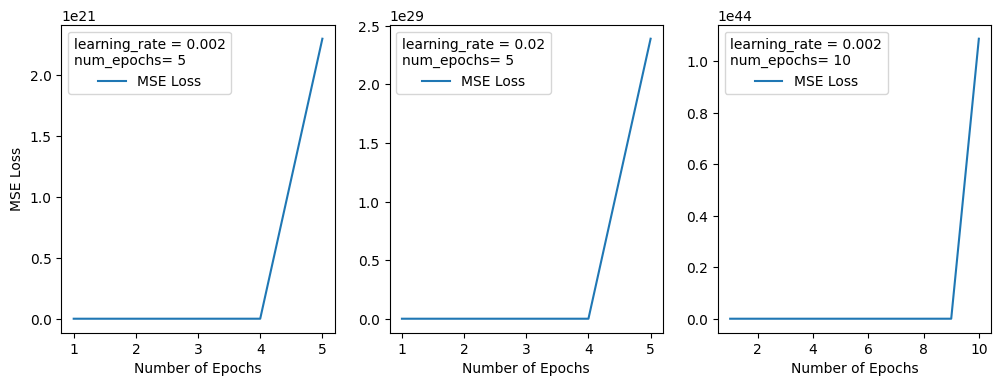

In [31]:
# YOUR CODE HERE

hyperparameter_list = [[0.002, 5],
                       [0.02, 5],
                       [0.002, 10]]

fig, ax = plt.subplots(1, len(hyperparameter_list),
                       figsize=(12, 4))

hyperparameter_list = [[0.002, 5],
                       [0.02, 5],
                       [0.002, 10]]

for i, row in enumerate(hyperparameter_list):
    ax[i].plot(np.arange(1, row[1] + 1),
               gradient_descent(X_train, Y_train, 
                                learning_rate=row[0],
                                num_epochs=row[1])[1],
                label="MSE Loss")
    ax[i].set_xlabel("Number of Epochs")
    ax[i].legend(title=f'learning_rate = {hyperparameter_list[i][0]}\nnum_epochs= {hyperparameter_list[i][1]}')
ax[0].set_ylabel("MSE Loss")
plt.show()



## The next code cell is **NOT ASKED** in the question statement but I plot it for my own benefit

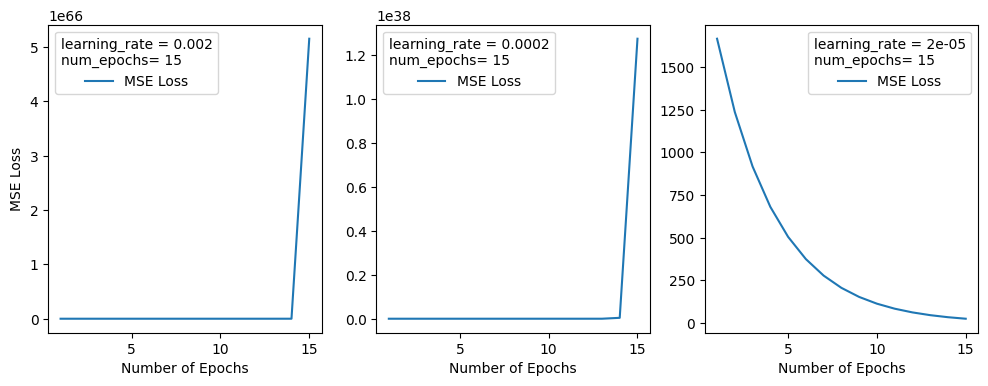

In [34]:

# Since the given hyperparameters all blow the loss function up, I added a new set of hyperparameters

hyperparameter_list = [[0.002, 15],
                       [0.0002, 15],
                       [0.00002, 15]]

fig, ax = plt.subplots(1, len(hyperparameter_list),
                       figsize=(12, 4))

for i, row in enumerate(hyperparameter_list):
    ax[i].plot(np.arange(1, row[1] + 1),
               gradient_descent(X_train, Y_train, 
                                learning_rate=row[0],
                                num_epochs=row[1])[1],
                label="MSE Loss")
    ax[i].set_xlabel("Number of Epochs")
    ax[i].legend(title=f'learning_rate = {hyperparameter_list[i][0]}\nnum_epochs= {hyperparameter_list[i][1]}')
ax[0].set_ylabel("MSE Loss")
plt.show()



### <span style="color:chocolate">Exercise 7:</span> Choosing the best model (10 points)

Write down the learned model that you consider most optimal given your answers to the hyperparameter tuning exercise. Call this model $M_3(x)$.

In [55]:
# YOUR ANSWER HERE

history = gradient_descent(X_train, Y_train,
                 learning_rate=0.00002,
                 num_epochs=15)
#$$gradient_descent$$
#history.shape
best_weights = history[0][-1]
best_weights[0]
print(f'The best model is M_3 = {best_weights[0]:.3f} + {best_weights[1]:.3f}x.')

The best model is M_3 = 1.019 + 1.877x.


## Comment: Best Model

The best model, if we are allowed to explore just a little beyond the given hyperparameters, is given by
$$ learning_rate = 0.00002 $$
$$ num_epochs = 15$$

### But if limited to the given hyperparameters:
$$ learning_rate = 0.002 $$
$$ num_epochs = 5$$
Although all three parameter combinations (in the given hyperparameters) blow loss up, **best** can be determined from the one that has the smallest loss. This doesn't make good sense. So I picked the first set of hyperparameters (in this markdown cell) to be the best model.

---
### Step 6: Evaluation and Generalization

To evaluate our models, we assess their performance based on how closely they fit the available data. In other words, we compare the true value $y$ with the predicted value $\hat{y}$ for each $x$.

### <span style="color:chocolate">Exercise 8:</span> Computing MSE (10 points)

Assess the performance of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) by computing the MSE metric on the training dataset. Hint: you can use the <span style="color:chocolate">mean_squared_error()</span> method available in sklearn.metrics.

In [66]:
# YOUR CODE HERE

# Recall we've already defined W1 (weights for model 1) and W2.

print(W1)
print(W2)
print(best_weights)

MSE_M1_train = mean_squared_error(y_true=Y_train,
                   y_pred=model_prediction(X_train, 
                                           W1))
MSE_M2_train = mean_squared_error(y_true=Y_train,
                   y_pred=model_prediction(X_train, 
                                           W2))
MSE_M3_train = mean_squared_error(y_true=Y_train,
                   y_pred=model_prediction(X_train, 
                                           best_weights))
                                        
print(MSE_M1_train)                                    
print(MSE_M2_train)                                    
print(MSE_M3_train)                                    


[5 1]
[1 2]
[1.01916907 1.87665896]
1397.608983658733
0.3280557752885262
25.898021698646712


### <span style="color:chocolate">Exercise 9:</span> Generalization (10 points)

Which of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) demonstrates better generalization ability?

In [67]:
# YOUR CODE HERE

# To find which model generalizes better, 

MSE_M1_test = mean_squared_error(y_true=Y_test,
                                y_pred=model_prediction(X_test, W1))
MSE_M2_test = mean_squared_error(y_true=Y_test,
                                y_pred=model_prediction(X_test, W2))
MSE_M3_test = mean_squared_error(y_true=Y_test,
                                y_pred=model_prediction(X_test, best_weights))
                                        
print(MSE_M1_test)                                    
print(MSE_M2_test)                                    
print(MSE_M3_test)                                    


1113.6003911560044
0.2908006971666422
20.249053669293456


----
#### <span style="color:chocolate">Additional practice question</span> (not graded)

1. How does stochastic gradient descent (SGD) differ from the gradient descent (GD) approach implemented in Exercise 5?
2. Determine the optimal weights for model $M_3(x)$ using SGD. Does SGD converge more rapidly? Explain the reasons for your answer.

In [ ]:
# YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE